<h1 align='center'>Assignment</h1>


Let's go out into the world and generate some beautiful visuals. Pick a data source from [this aggregation](https://github.com/awesomedata/awesome-public-datasets), load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.

Collect your images and descriptions into a shareable format. A Jupyter notebook is best, but anything you can link to is fine, including Google docs or markdown files on GitHub or gists, and share the link below.

<h1 align='center'>Bringing in the Data/Getting Data into Workable Format

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches ---> used this in a prior iteration to help create labels on my graphs
%matplotlib inline

In [2]:
df = pd.read_csv('Data USA Cart.csv')

In [3]:
df

,ID Geography,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018)
0,05000US20201,"Washington County, KS",0.341,0.334,0.320,0.307,0.312
1,05000US56045,"Weston County, WY",0.313,0.288,0.294,0.292,0.320
2,05000US01001,"Autauga County, AL",0.305,0.313,0.309,0.341,0.364
3,05000US36119,"Westchester County, NY",0.172,0.178,0.196,0.203,0.208
4,05000US36115,"Washington County, NY",0.283,0.290,0.298,0.319,0.308
5,05000US01003,"Baldwin County, AL",0.266,0.250,0.267,0.274,0.293
6,05000US56043,"Washakie County, WY",0.241,0.242,0.247,0.277,0.271
7,05000US36113,"Warren County, NY",0.288,0.271,0.260,0.274,0.259
8,05000US36121,"Wyoming County, NY",0.296,0.284,0.263,0.256,0.272
9,05000US01005,"Barbour County, AL",0.373,0.384,0.408,0.444,0.442


In [4]:
subset = 'Adult Obesity (2014)	Adult Obesity (2015)	Adult Obesity (2016)	Adult Obesity (2017)	Adult Obesity (2018)'

In [5]:
subset = subset.split("\t")

In [6]:
df_narows = df[df.isna().any(axis=1)]

In [7]:
df_narows

,ID Geography,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018)
253,05000US02105,"Hoonah-Angoon Census Area, AK",NaN,NaN,NaN,NaN,0.321
267,05000US02158,"Kusilvak Census Area, AK",NaN,NaN,NaN,NaN,0.275
285,05000US02195,"Petersburg Borough, AK",NaN,NaN,NaN,NaN,0.312
286,05000US02198,"Prince of Wales-Hyder Census Area, AK",NaN,NaN,NaN,NaN,0.344
290,05000US02230,"Skagway Municipality, AK",NaN,NaN,NaN,NaN,0.287
298,05000US02275,"Wrangell City and Borough, AK",NaN,NaN,NaN,NaN,0.334
2630,05000US46102,"Oglala Lakota County, SD",NaN,NaN,NaN,NaN,0.412


In [8]:
len(df_narows)

7

In [9]:
len(df_narows)/len(df)*100

0.22278803309993636

Looks like there are 7 rows without proper data. To keep our data consistent throughout the years, we will eliminate these 7 counties from our dataset. These rows account for ~0.22% of the data, so I don't think it should skew our results.

In [10]:
df = df.dropna(axis=0, how='any', subset=subset)          

In [11]:
df

,ID Geography,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018)
0,05000US20201,"Washington County, KS",0.341,0.334,0.320,0.307,0.312
1,05000US56045,"Weston County, WY",0.313,0.288,0.294,0.292,0.320
2,05000US01001,"Autauga County, AL",0.305,0.313,0.309,0.341,0.364
3,05000US36119,"Westchester County, NY",0.172,0.178,0.196,0.203,0.208
4,05000US36115,"Washington County, NY",0.283,0.290,0.298,0.319,0.308
5,05000US01003,"Baldwin County, AL",0.266,0.250,0.267,0.274,0.293
6,05000US56043,"Washakie County, WY",0.241,0.242,0.247,0.277,0.271
7,05000US36113,"Warren County, NY",0.288,0.271,0.260,0.274,0.259
8,05000US36121,"Wyoming County, NY",0.296,0.284,0.263,0.256,0.272
9,05000US01005,"Barbour County, AL",0.373,0.384,0.408,0.444,0.442


In [12]:
print(len(df))
print(type(df))

3135
<class 'pandas.core.frame.DataFrame'>


Success! We now have a DataFrame in variable df with only complete rows.

In [13]:
#s2014 = {'head': df['Adult Obesity (2014)'], 'year' : '2014'}
#s2015 = {'head': df['Adult Obesity (2015)'], 'year' : '2015'}
#s2016 = {'head': df['Adult Obesity (2016)'], 'year' : '2016'}
#s2017 = {'head': df['Adult Obesity (2017)'], 'year' : '2017'}
#s2018 = {'head': df['Adult Obesity (2018)'], 'year' : '2018'}

*Quick note here, I ended up not needing the above in dictionary form. In a prior iteration of this assignment, I was using dictionaries to help name information in my graphs, however I found a better way to do it directly from the DataFrame as more time and research was spent. Thus the creation of the DataFrame below can be redone.*

In [14]:
#numdf = pd.DataFrame([s2014['head'], s2015['head'], s2016['head'], s2017['head'], s2018['head']]).transpose()

*Altered version of above cell is now done in the next cell since I no longer need to call from a dictionary.*

In [15]:
numdf = df.drop(columns=['ID Geography','Geography'])

In [16]:
numdf

,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018)
0,0.341,0.334,0.320,0.307,0.312
1,0.313,0.288,0.294,0.292,0.320
2,0.305,0.313,0.309,0.341,0.364
3,0.172,0.178,0.196,0.203,0.208
4,0.283,0.290,0.298,0.319,0.308
5,0.266,0.250,0.267,0.274,0.293
6,0.241,0.242,0.247,0.277,0.271
7,0.288,0.271,0.260,0.274,0.259
8,0.296,0.284,0.263,0.256,0.272
9,0.373,0.384,0.408,0.444,0.442


Now we have a DataFrame `numdf` with only the numerical data from each county, I removed the other columns as they were superfluous for the graphs I plan to create.

<h1 align='center'>Plotting some Histograms!</h1>

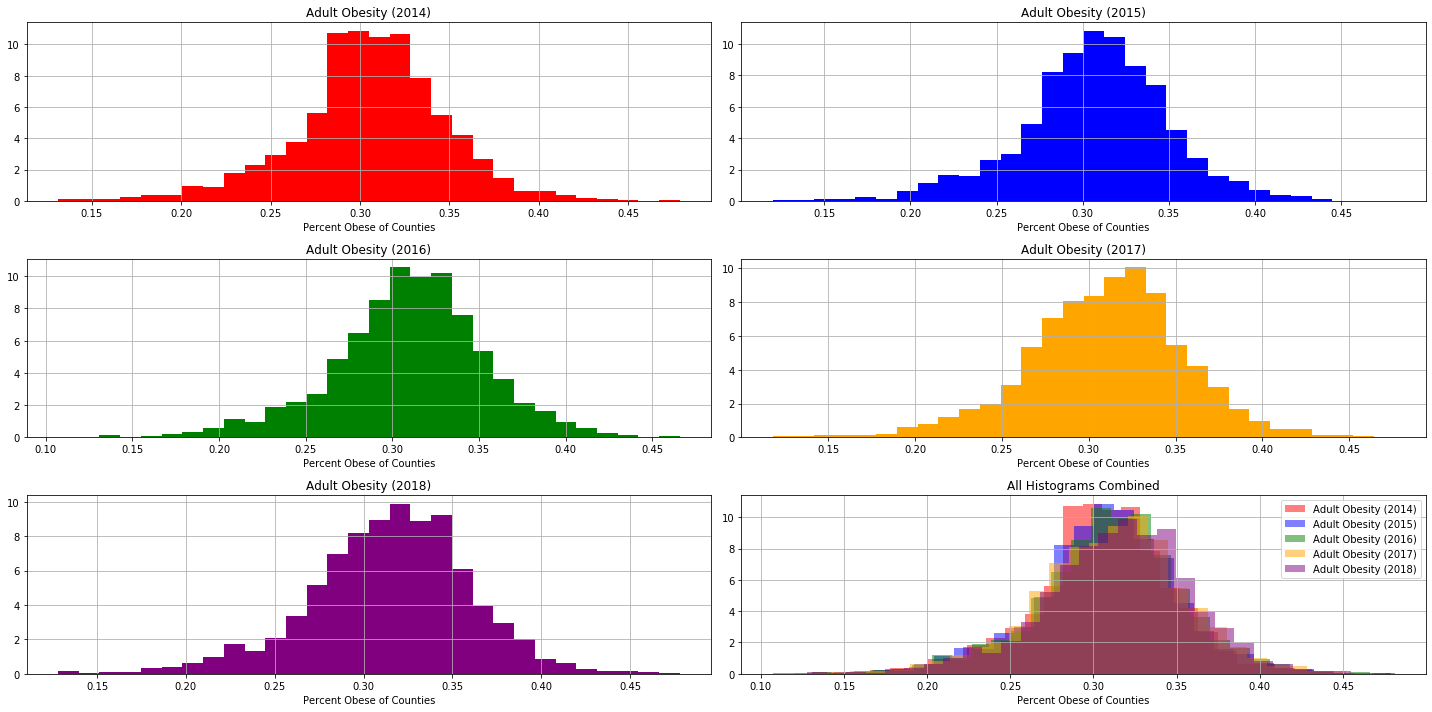

In [17]:
plt.figure(figsize=(20, 10))
count = 1
colors = ['red','blue','green','orange','purple']
for col in numdf.columns:
    plt.subplot(3, 2, count)
    numdf[col].hist(density=True, bins=30, alpha=1, color=colors[count-1])
    plt.xlabel('Percent Obese of Counties')
    plt.title(col)
    count += 1

plt.subplot(3, 2, 6)
count2 = 1
for col in numdf.columns:
    numdf[col].hist(density=True, bins=30, alpha=.5, color=colors[count2-1], label=col)
    plt.xlabel('Percent Obese of Counties')
    count2 += 1
plt.legend()
plt.title('All Histograms Combined')

plt.tight_layout()
plt.show()

The above shows six histograms. The first five are each year on their own, so we can get an idea of each year's distribution, and each year appears to be pretty normal. Then the sixth graph shows each of the other graphs placed on top of one another. Looking at the sixth graph we can see that there was not a very large change of obesity rates throughout the years 2014 to 2018 in the United States.

Now let's compare the average obesity rate from the year 2014 to 2018.

<h1 align='center'>Line Plots

In [18]:
means = []
def find_means(df):    
    for col in df.columns:
        means.append(np.mean(df[col]))

In [19]:
find_means(numdf)

In [20]:
print(means)

[0.3055151514126734, 0.30684944183775115, 0.3094108451852958, 0.31012440180759493, 0.3147106859244798]


Now we have all the means in a list aptly titled "means" so we can easily call it later.

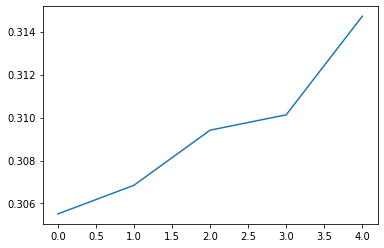

In [21]:
plt.plot(means)

The above gives us a quick cursory look at the change of mean over time; looks like it grew every single year. However, without context this graph doesn't tell us much, let't try to clean it up a bit. First, we will convert these means back into a DataFrame.

In [22]:
indexs = []
for col in numdf:
    indexs.append(col)

In [23]:
meansdf = pd.DataFrame(means, index=indexs)

In [24]:
meansdf

,0
Adult Obesity (2014),0.305515
Adult Obesity (2015),0.306849
Adult Obesity (2016),0.309411
Adult Obesity (2017),0.310124
Adult Obesity (2018),0.314711


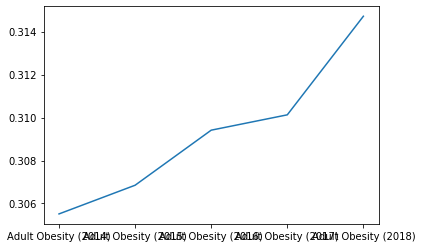

In [25]:
plt.plot(meansdf)
plt.show()

Getting better! The x axis labels are a little busy and we don't have a name for the y axis or a title. Let's fix that. We can also make it bigger to make it more readable.

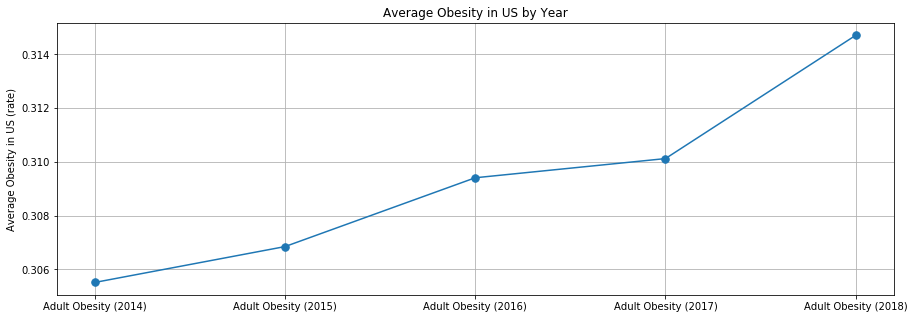

In [26]:
plt.figure(figsize=(15,5))
plt.plot(meansdf, marker='.', ms=15)
plt.grid()
plt.ylabel('Average Obesity in US (rate)')
plt.title('Average Obesity in US by Year')
plt.show()

That is a bit better! Now we can see each year and point clearly. One way this could be improved, since it is such a simple graph, is to show the value of each point stemming off the point of each graph. I'm sure there is a way to do this, but I'm already taking too much time on this as it is. From the above we can definitely see the average obesity rate is rising. This may be very slight, but still interesting to see.

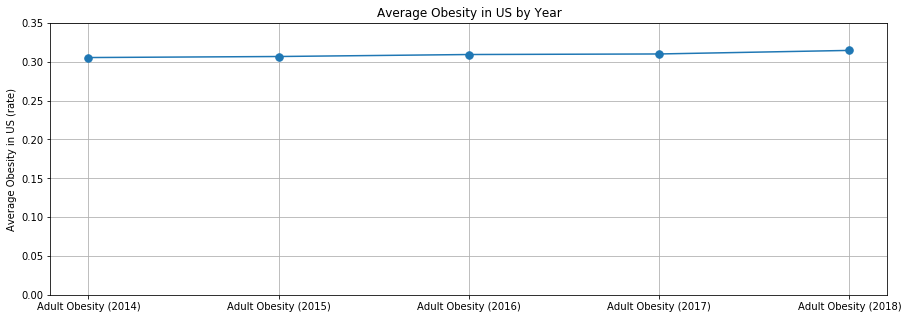

In [27]:
plt.figure(figsize=(15,5))
plt.plot(meansdf, marker='.', ms=15)
plt.ylim([0,.35])
plt.grid()
plt.ylabel('Average Obesity in US (rate)')
plt.title('Average Obesity in US by Year')
plt.show()

When we change the lower limit of the y axis, we can see that this change may be negligable and it appears the changes are almost a straight line. Perhaps the prior graph was a bit misleading. Lets try one more type of graph pulling from our numdf DataFrame.

<h1 align=center>BOXPLOTS

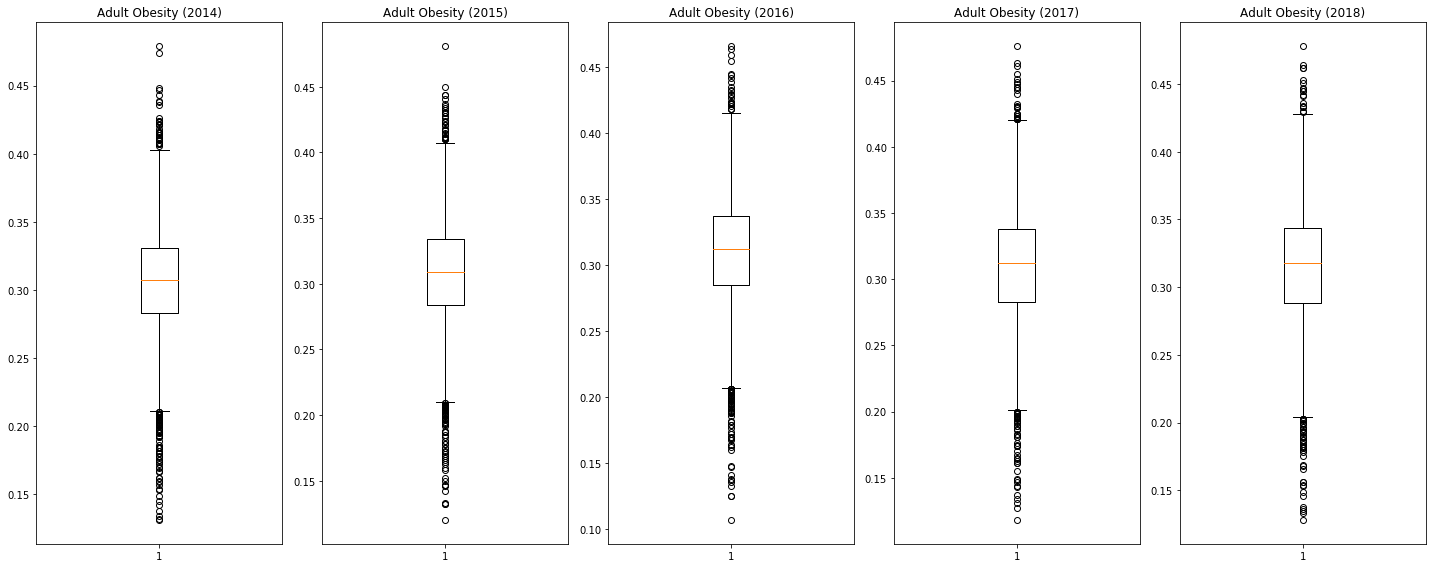

In [28]:
plt.figure(figsize=(20, 8))
count = 1
for col in numdf.columns:
    plt.subplot(1, 5, count)
    plt.boxplot(numdf[col])
    plt.title(col)
    count += 1
plt.tight_layout()
plt.show()

The above shows five boxplots, one for each year we have data on. From this we can discover some information about the quartiles of the data. The initial thing I see is numerous 'fliers' in each of the graphs. Our fliers are possible outliers, however, due to the type of dataset we have, I think we are expected to have a number of 'fliers' that are not actually outliers. On a cursory look, 2016 appears to have the highest IQR (interquartile range), which may make you think the data's mean from that year is higher as well. However, our y-limits or range on the y axis are actually different for each graph. Let's set them all to the same range below.

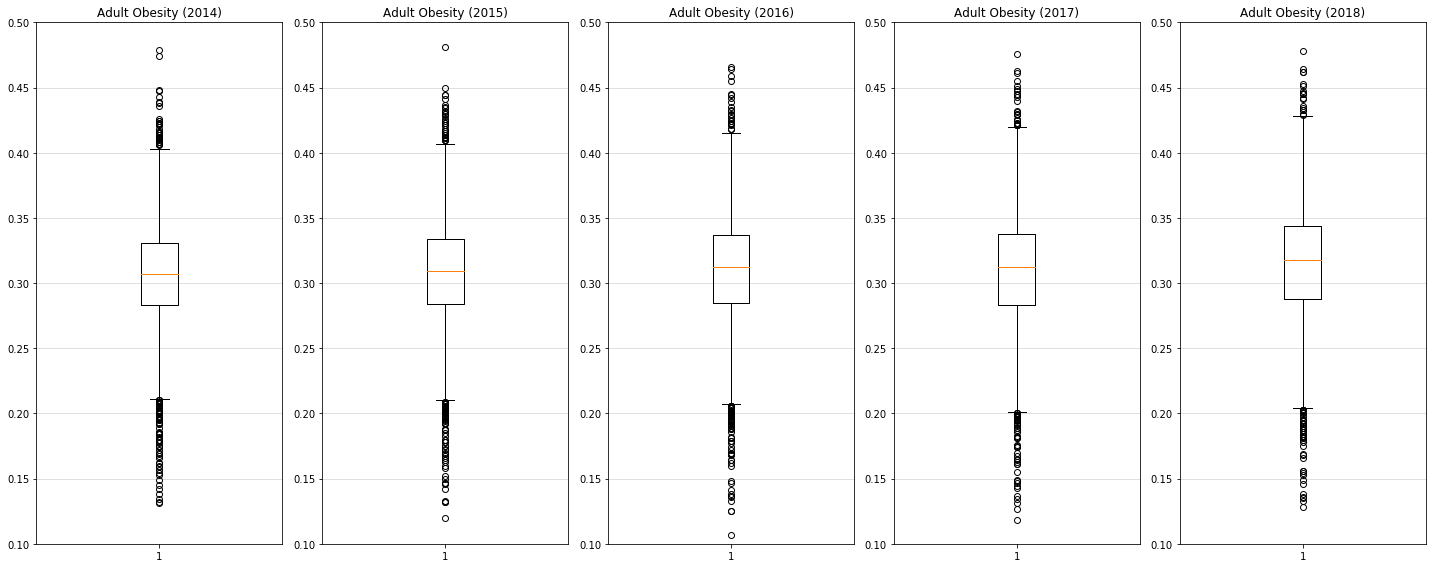

In [29]:
plt.figure(figsize=(20, 8))
count = 1
hlines = np.arange(.1,.5,.05)
for col in numdf.columns:
    plt.subplot(1, 5, count)
    plt.boxplot(numdf[col])
    plt.ylim([.1,.5])
    plt.grid(axis='y', alpha=.5)
    plt.title(col)
    count += 1
plt.tight_layout()
plt.show()

There we go, now we can see the differences between the years much more clearly. We can see that mean grow over time and the IQR is raising every year.

<h1 align='center'>Summary/Thoughts</h1>

This assignment had me googling all over the place! Learned lots of stuff, perhaps most importantly how to better read documentation for a given method/function. I scoured the web for information on [matplotlib.pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot). Primarily, I dug through [plt.plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot), [plt.hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) and [plt.boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) ('plt' indicating the whole 'matplotlib.pyplt' call) in order to learn about the various methods and functions available. I also used Stack Overflow a lot! Very helpful when faced with a particular question on how to implement a method/function correctly in my code. 

My final version contains some code that I ended up not needing to use, however I left it in to refer back to later if need be. This also allows me to document changes I made over time. I wonder if there is a way to use `GitHub` in conjunction with `jupyter notebooks` in order to keep track of my progress/changes I made to the file over time. I'm sure there is, but haven't had the time to look into it yet.

Overall, I learned how to create and view different types of graphs in different ways (put in the simplest of terms).

And above all else, Google (and the documentation) was my best friend.